# Week02   Peilin Luo's solutions

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [57]:
# standard normal distribution, to be compared with my results through week2 homework
mu, sigma = 0, 1
def f_std_normal(x):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))

## Problem1

To prove whether the skewness and kurtosis functions in statistical packages are biased, I generate a standard normal distribution, **s ~ N(0, 1)**. So I already know the skewness and kurtosis should both be 0. I will calculate the skewness and kurtosis of samples taken from s using the statistical package's function. Then I will compare my results with a standard normal distribution to see if they are biased. Also, I will conduct T-test for my results to further illustrate their bias.

First, I calculate the skewness and kurtosis for 1000 times using statistical package's functions, and store my results in **s_skew** array and **s_kurt** array.

In [58]:
# for standard normal distribution s, skew = 0, kurt = 0
samples = 1000
s_skew = np.arange(float(samples))
s_kurt = np.arange(float(samples))
for i in range(samples):
    s = np.random.normal(mu, sigma, 10)
    s_skew[i] = st.skew(s)
    s_kurt[i] = st.kurtosis(s)

For s_skew and s_kurt, I draw **histograms** for them and **compared them to standard normal distribution**. The red line is standard normal distribution. From the charts, the kurtosis function is obviously biased, but the skewness function is hard to say.

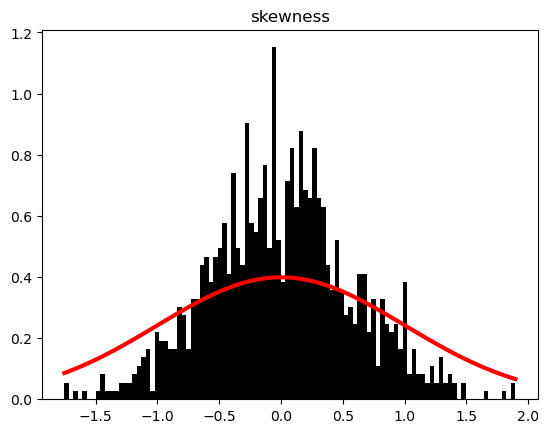

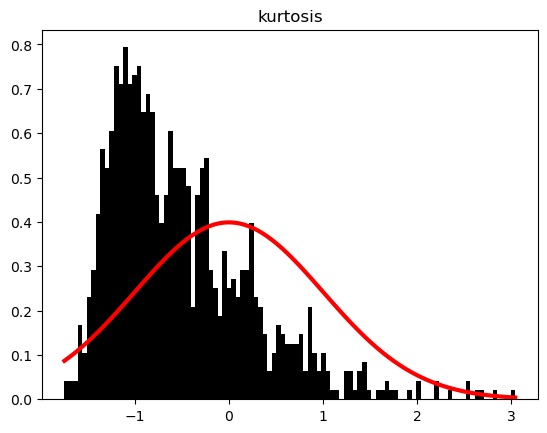

In [59]:
count, bins, ignored = plt.hist(s_skew, 100, density=True, color='k')
plt.plot(bins, f_std_normal(bins), linewidth=3, color='r')
plt.title("skewness")
plt.show()
count, bins, ignored = plt.hist(s_kurt, 100, density=True, color='k')
plt.plot(bins, f_std_normal(bins), linewidth=3, color='r')
plt.title("kurtosis")
plt.show()

I then conduct **T-test** for my results. According to the t value and p value, for kurtosis, we should refuse the null hypothesis, so package's kurtosis function is biased. For skewness, we cannot refuse the null hypothesis, so it is hard to prove that package's skewness function is biased.

In [60]:
t_value, p_value = st.ttest_1samp(s_skew, 0)
t_value2, p_value2 = st.ttest_1samp(s_kurt, 0)
print("t value, p value for skewness: ", t_value, p_value)
print("t value, p value for kurtosis: ", t_value2, p_value2)

t value, p value for skewness:  0.14938138499454462 0.881282850063192
t value, p value for kurtosis:  -21.519878032440037 1.0639332249001462e-84


Then I **increase my sample size to 100,000** to further prove my results.

In [61]:
# increase sample size to 100000
samples = 100_000
s_skew = np.arange(float(samples))
s_kurt = np.arange(float(samples))
for i in range(samples):
    s = np.random.normal(mu, sigma, 10)
    s_skew[i] = st.skew(s)
    s_kurt[i] = st.kurtosis(s)

I draw **histograms** for my results and compare them with the standard normal distribution. The kurtosis is still biased, and the skewness is still hard to say.

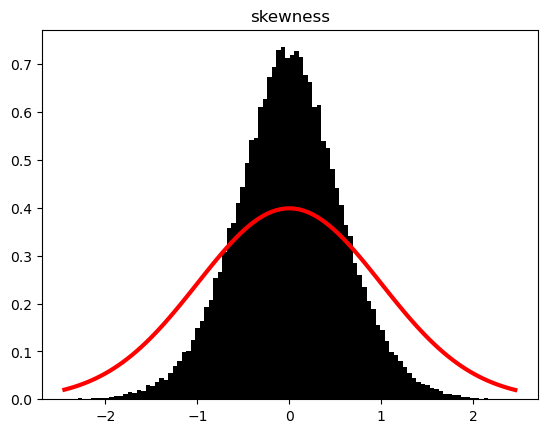

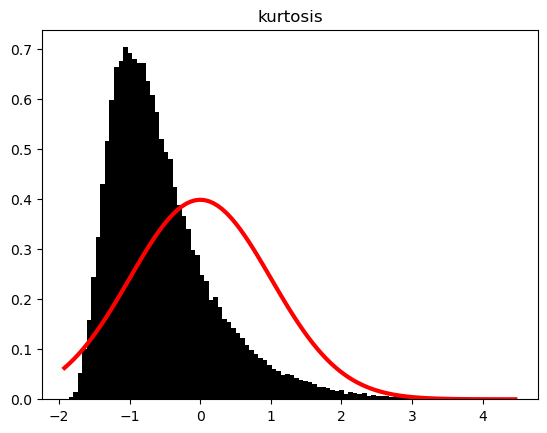

In [62]:
count, bins, ignored = plt.hist(s_skew, 100, density=True, color='k')
plt.plot(bins, f_std_normal(bins), linewidth=3, color='r')
plt.title("skewness")
plt.show()
count, bins, ignored = plt.hist(s_kurt, 100, density=True, color='k')
plt.plot(bins, f_std_normal(bins), linewidth=3, color='r')
plt.title("kurtosis")
plt.show()

I conduct **T-tests** for my new results. P value of kurtosis is 0, so **in conclusion, the statistical package's kurtosis function must be biased**. However, it is **hard to prove that the statistical package's skewness function is biased**.

In [63]:
t_value, p_value = st.ttest_1samp(s_skew, 0)
t_value2, p_value2 = st.ttest_1samp(s_kurt, 0)
print("t value, p value for skewness: ", t_value, p_value)
print("t value, p value for kurtosis: ", t_value2, p_value2)

t value, p value for skewness:  -0.6071125819818041 0.5437775792563772
t value, p value for kurtosis:  -226.5133838091808 0.0


## Problem2

For problem 2, I **fit the data in problem2.csv using OLS** and get the error vector. To test the assumption of normally distributed errors, I will draw a histogram for the error vector and calculate its skewness and kurtosis.

After reading data to X matrix and Y matrix, I calculate **beta B (B = 0.61)** using OLS and calculate the error vector. From the histogram (red line is the standard normal distribution), error vector is not so align with the standard normal distribution. Also, the skewness of error vector is -0.27, and the kurtosis of error vector is 3.19. So the error vector is leptokurtic (slender and fatter tails). **In conclusion, error vector fails the assumption of normally distributed**. The error vector is more likely to be T distributed.

**OLS model: y = 0.61x + e**

In [64]:
df = pd.read_csv('problem2.csv')
# prepare vector x and y from csv file
X = np.mat(df['x']).T
Y = np.mat(df['y']).T

beta using OLS:  0.6051912114646786


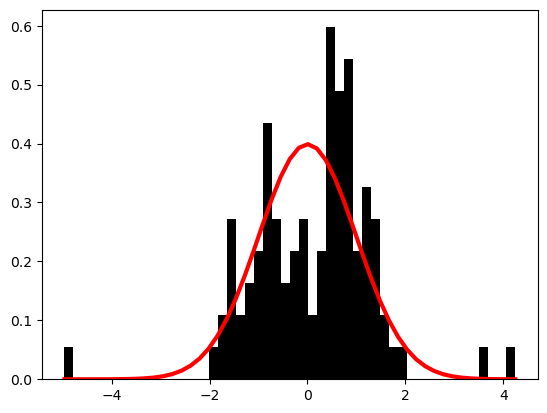

skewness and kurtosis for error term:  [-0.26725989] [3.19313036]


In [65]:
# calculate beta and error
B = (X.T @ X).I @ X.T @ Y
e = Y - X @ B
print("beta using OLS: ", float(B))
count, bins, ignored = plt.hist(e, 50, density=True, color='k')
plt.plot(bins, f_std_normal(bins), linewidth=3, color='r')
plt.show()
print("skewness and kurtosis for error term: ", st.skew(e), st.kurtosis(e))

To **fit the data using MLE with the assumption of normality**, I construct the negative_normal_ll function with two arguments, s (standard deviation of error) and beta. This function will return the negative log likelihood for the error vector with the normality assumption.

In [66]:
from scipy import optimize
import math

In [67]:
def negative_normal_ll(arguments):
    s, beta = arguments[0], arguments[1]
    n = Y.size
    er = Y - X * beta
    s2 = s * s
    ll = -n / 2 * math.log(s2 * 2 * np.pi) - er.T @ er / (2 * s2)
    return -ll

Then I use scipy's optimizer to solve MLE. According to my results, **beta is 0.61**, which is same as OLS's result. AIC for this model is 326.98.

**MLE model on normally distributed assumption: y = 0.61x + e** (same with OLS)

In [68]:
bnds = ((0.0, None), (None, None))
result_normal = optimize.minimize(negative_normal_ll, (1.0, 0.6), bounds=bnds)
normal_beta = result_normal.x[1]
normal_s = result_normal.x[0]
normal_ll = -negative_normal_ll([normal_s, normal_beta])
AIC1 = 2 * 3 - 2 * normal_ll  # k = 3 considering s, beta and intercept
print("Normal beta: ", normal_beta)
print("Normal S: ", normal_s)
print("Normal LL: ", float(normal_ll))
print("Normal AIC: ", float(AIC1))

Normal beta:  0.6051911718109909
Normal S:  1.2043708017787045
Normal LL:  -160.48958667300894
Normal AIC:  326.9791733460179


To **fit the data using MLE with the assumption of a T distribution of errors**, I construct negative_t_ll function to calculate the negative log likelihood of the error vector which is T distributed. There are three arguments in negative_t_ll function: s stands for standard deviation of errors; free stands for DF parameter; and beta.

In [69]:
def __t_loglikelihood(mu, s, free, x):
    n = Y.size
    free12 = (free + 1.0) / 2.0
    part1 = math.lgamma(free12) - math.lgamma(free / 2.0) - math.log(s * math.sqrt(free * np.pi))
    part2 = 1.0 + (1 / free) * (np.multiply((x - mu) / s, (x - mu) / s))
    part2_sum = (np.log(part2)).sum()
    ll = n * part1 - free12 * part2_sum
    return ll

def negative_t_ll(arguments):
    s, free, beta = arguments[0], arguments[1], arguments[2]
    er = Y - X * beta
    ll = __t_loglikelihood(0.0, s, free, er)
    return -ll

Using optimizer to solve this model, I get the **beta, 0.55**. AIC for this model is 320.57. Therefore, MLE on T distribution has a smaller AIC than that on normal distribution. In conclusion, **MLE on T distribution is the best fit**.

**MLE model on T distributed assumption: y = 0.55x + e**

Additionally, this conclusion tells that **the breaking of the normality assumption will make the beta we calculate using OLS biased**. To illustrate, the beta in MLE model on T distribution is 0.55, different from the beta in OLS (0.61).

In [70]:
bnds2 = ((0.0, None), (3, None), (None, None))
result_t = optimize.minimize(negative_t_ll, (1.0, 10, 0.6), bounds=bnds2)
t_beta = result_t.x[2]
t_free = result_t.x[1]
t_s = result_t.x[0]
t_ll = -negative_t_ll([t_s, t_free, t_beta])
AIC2 = 2 * 4 - 2 * t_ll  # k = 4 considering s, degree of freedom, beta and intercept
print("T distribution beta: ", t_beta)
print("T distribution degree of freedom: ", t_free)
print("T distribution S: ", t_s)
print("T distribution LL: ", float(t_ll))
print("T distribution AIC: ", float(AIC2))

T distribution beta:  0.5485449022902622
T distribution degree of freedom:  6.6678130854732585
T distribution S:  0.9889805025515216
T distribution LL:  -156.28523602578463
T distribution AIC:  320.57047205156925


## Problem3

For problem3, to simulate AR(1) through AR(3) and MA(1) through MA(3) processes, I construct function get_AR_n(number) to generate AR(number) process, and function get_MA_n(number) to generate MA(number) process.

In [71]:
from statsmodels.tsa.stattools import acf, pacf

n = 1000
x = np.arange(n)
err = np.random.randn(n)

In [72]:
def get_AR_n(number):
    y_time_series = np.zeros(n)
    for i in range(number):
        y_time_series[i] = i + 1.0
    for i in range(number, n):
        y_time_series[i] = 1.0 + err[i]
        for j in range(number):
            y_time_series[i] += 0.3 * y_time_series[i-j-1]
    return y_time_series

Here, I generate **AR(1)** series as:

**y(t) = 1 + 0.3y(t-1) + e(t)**

Plotting the ACF and PACF of AR(1), the ACF decreases to 0 more slowly than the PACF.

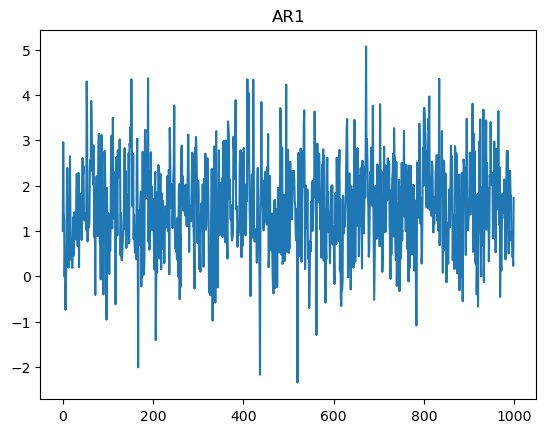

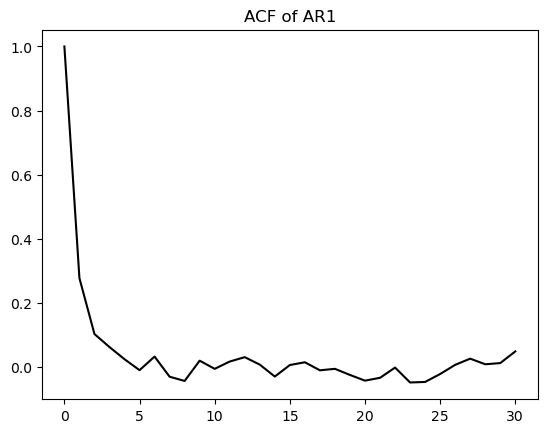

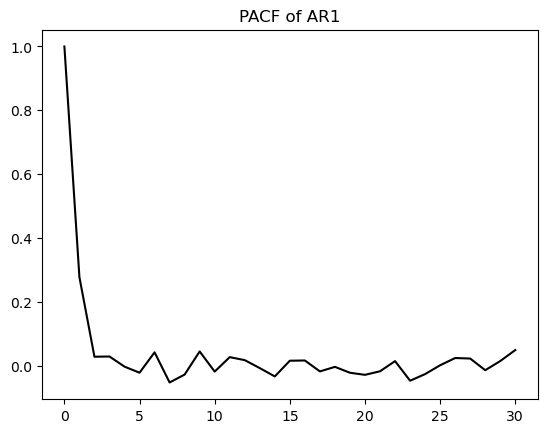

In [73]:
# AR(1)
AR1 = get_AR_n(1)
plt.plot(x, AR1)
plt.title("AR1")
plt.show()
AR1_ACF = acf(AR1)
plt.plot(AR1_ACF, color='k')
plt.title("ACF of AR1")
plt.show()
AR1_PACF = pacf(AR1)
plt.plot(AR1_PACF, color='k')
plt.title("PACF of AR1")
plt.show()

Here, I generate **AR(2)** series as:

**y(t) = 1 + 0.3y(t-1) + 0.3y(t-2) + e(t)**

Plotting the ACF and PACF of AR(2), the ACF declines gradually and the PACF drops instantly. This difference is more obvious than AR(1).

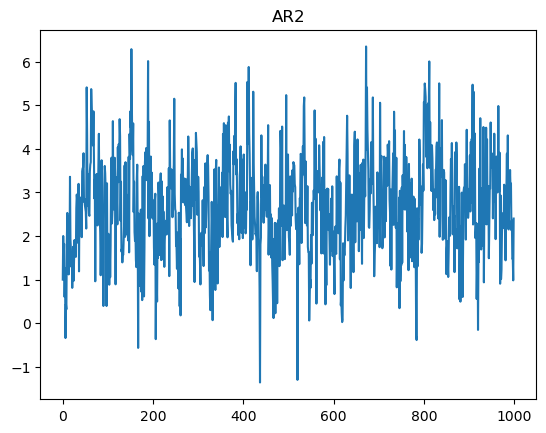

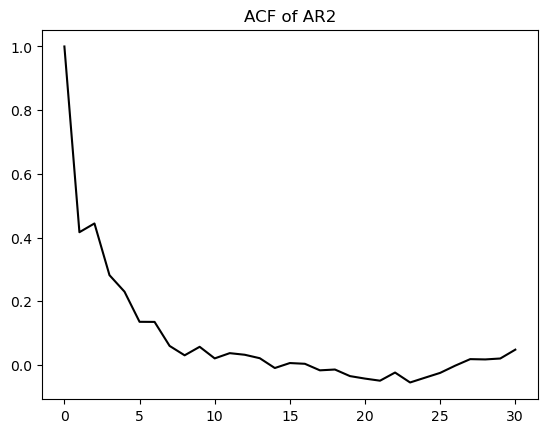

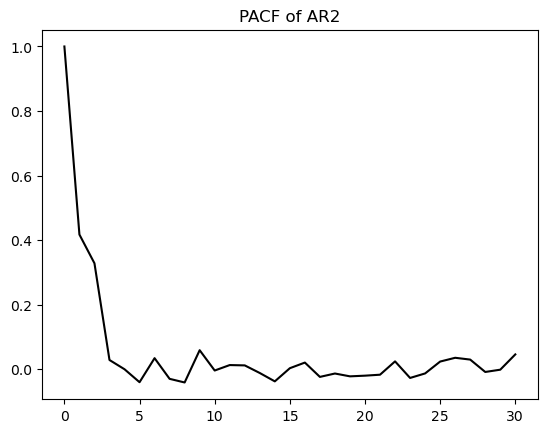

In [74]:
# AR(2)
AR2 = get_AR_n(2)
plt.plot(x, AR2)
plt.title("AR2")
plt.show()
AR2_ACF = acf(AR2)
plt.plot(AR2_ACF, color='k')
plt.title("ACF of AR2")
plt.show()
AR2_PACF = pacf(AR2)
plt.plot(AR2_PACF, color='k')
plt.title("PACF of AR2")
plt.show()

Here, I generate **AR(3)** series as:

**y(t) = 1 + 0.3y(t-1) + 0.3y(t-2) + 0.3y(t-3) + e(t)**

Plotting the ACF and PACF of AR(3), comparing to AR(2), **the ACF declines more gradually and the PACF drops more instantly**. The way in which ACF and PACF change could help us to **identify an autoregressive process**. Additionally, **as the order of an autoregressive process increases, this conclusion becomes more and more obvious**.

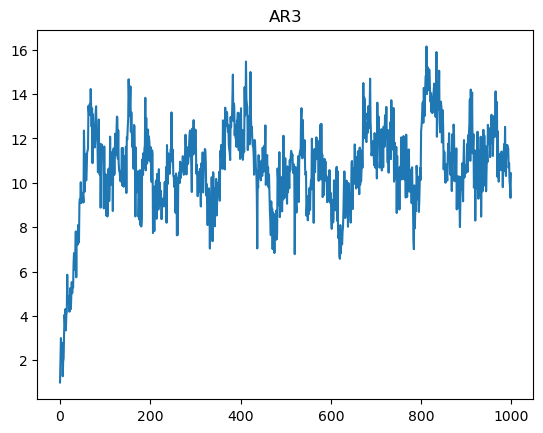

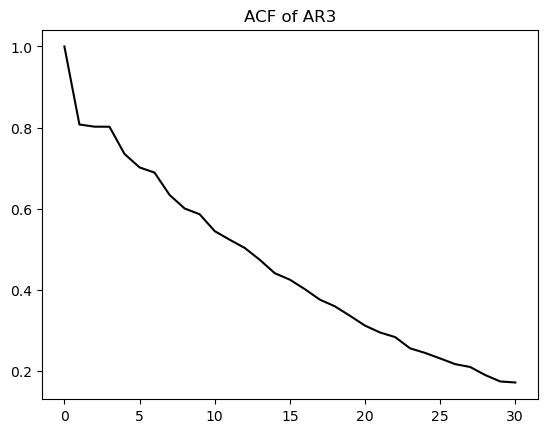

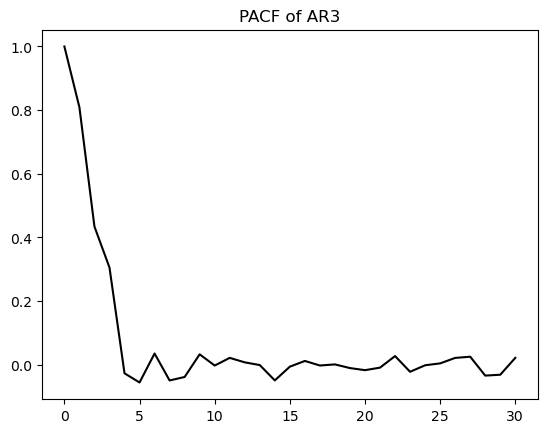

In [75]:
# AR(3)
AR3 = get_AR_n(3)
plt.plot(x, AR3)
plt.title("AR3")
plt.show()
AR3_ACF = acf(AR3)
plt.plot(AR3_ACF, color='k')
plt.title("ACF of AR3")
plt.show()
AR3_PACF = pacf(AR3)
plt.plot(AR3_PACF, color='k')
plt.title("PACF of AR3")
plt.show()

Here is my function generating MA(number) process.

In [76]:
def get_MA_n(number):
    y_time_series = np.zeros(n)
    for i in range(number):
        y_time_series[i] = 1.0
    for i in range(number, n):
        y_time_series[i] = 1.0 + err[i]
        for j in range(number):
            y_time_series[i] += 5 * err[i-j-1]
    return y_time_series

Here, I generate **MA(1)** series as:

**y(t) = 1 + e(t) + 5e(t-1)**

Plotting the ACF and PACF of MA(1), the PACF and the ACF are almost indistinguishable.

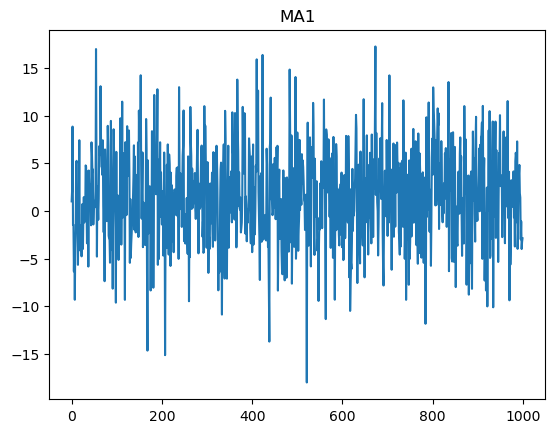

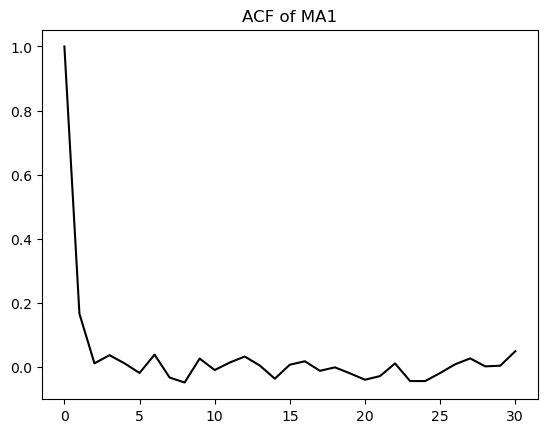

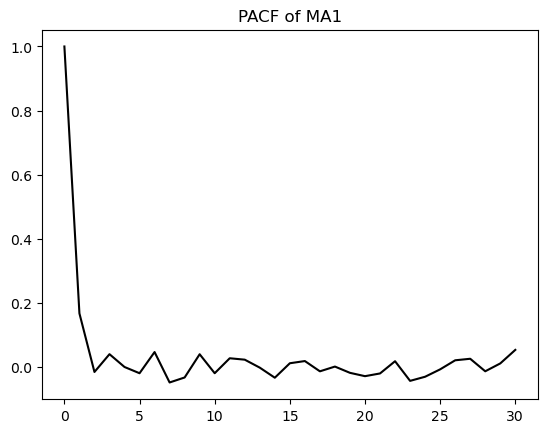

In [77]:
# MA(1)
MA1 = get_MA_n(1)
plt.plot(x, MA1)
plt.title("MA1")
plt.show()
MA1_ACF = acf(MA1)
plt.plot(MA1_ACF, color='k')
plt.title("ACF of MA1")
plt.show()
MA1_PACF = pacf(MA1)
plt.plot(MA1_PACF, color='k')
plt.title("PACF of MA1")
plt.show()

Here, I generate **MA(2)** series as:

**y(t) = 1 + e(t) + 5e(t-1) + 5e(t-2)**

Plotting the ACF and PACF of MA(2), the PACF is more fluctuate and is going to 0 more slowly than ACF. The ACF drops instantly.

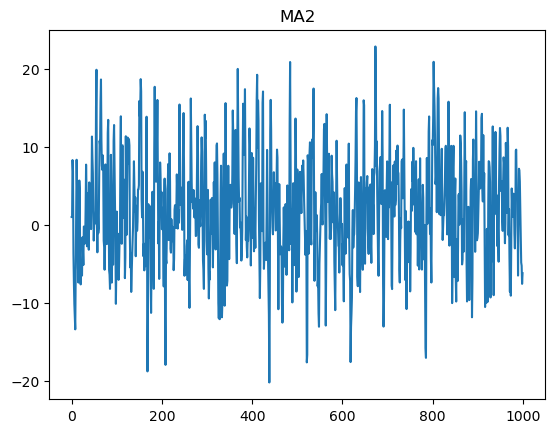

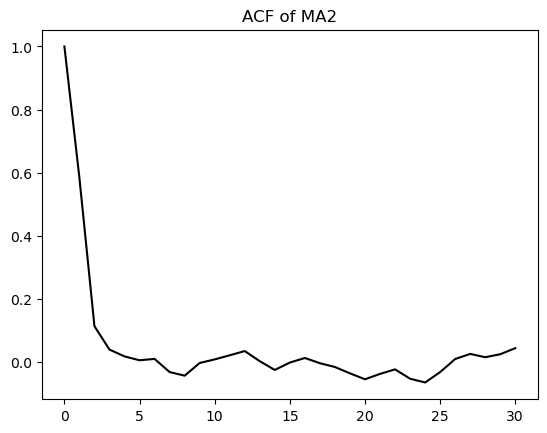

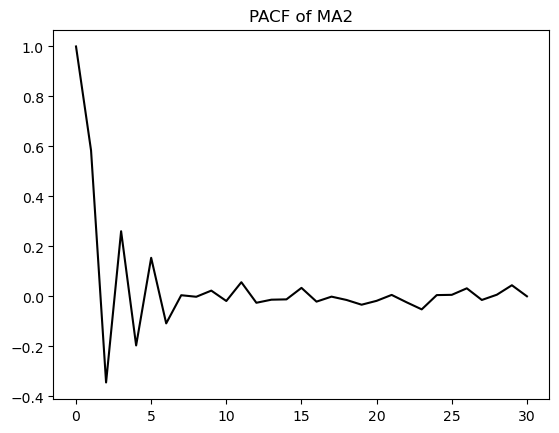

In [78]:
# MA(2)
MA2 = get_MA_n(2)
plt.plot(x, MA2)
plt.title("MA2")
plt.show()
MA2_ACF = acf(MA2)
plt.plot(MA2_ACF, color='k')
plt.title("ACF of MA2")
plt.show()
MA2_PACF = pacf(MA2)
plt.plot(MA2_PACF, color='k')
plt.title("PACF of MA2")
plt.show()

Here, I generate **MA(3)** series as:

**y(t) = 1 + e(t) + 5e(t-1) + 5e(t-2) + 5e(t-3)**

Plotting the ACF and PACF of MA(3), like MA(2), **the PACF is going to 0 more slowly than ACF, while the ACF drops instantly**. This pattern could help us to **identify a moving average process**. Additionally, **as the order of a moving average process increases, this pattern becomes more and more obvious**.

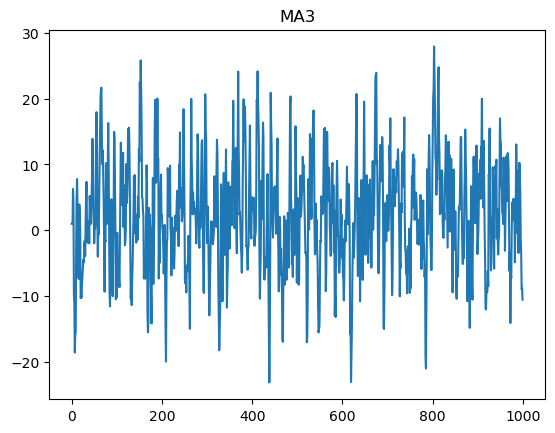

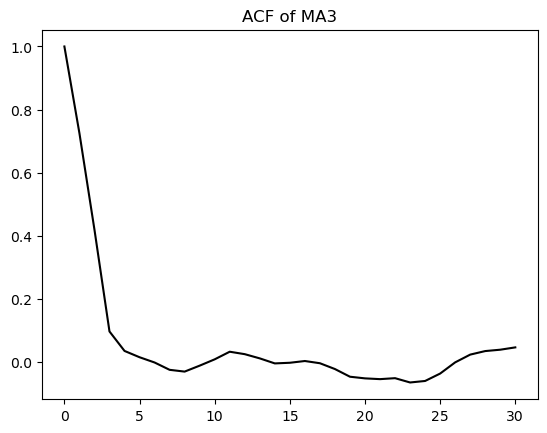

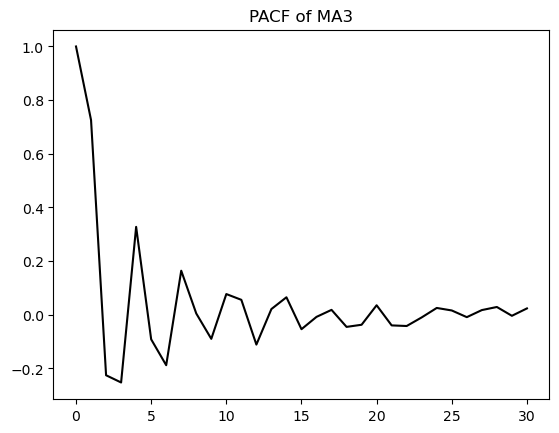

In [79]:
# MA(3)
MA3 = get_MA_n(3)
plt.plot(x, MA3)
plt.title("MA3")
plt.show()
MA3_ACF = acf(MA3)
plt.plot(MA3_ACF, color='k')
plt.title("ACF of MA3")
plt.show()
MA3_PACF = pacf(MA3)
plt.plot(MA3_PACF, color='k')
plt.title("PACF of MA3")
plt.show()